# EDA: Plotting Weather Conditions Against Mosquito Abundance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [2]:
df = pd.read_csv('../data/final_dataframe.csv', index_col=0)

In [3]:
df.columns

Index(['Trap', 'Species', 'NumMosquitos', 'WnvPresent', 'Day_length', 'Tmax',
       'Tmin', 'Tavg', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Sunset',
       'Sunrise', 'Heat', 'Depart', 'DewPoint', 'WetBulb', 'Cool', 'CodeSum',
       'PrecipTotal', 'StnPressure', 'Date2', 'Latitude', 'Longitude', 'Month',
       'Year'],
      dtype='object')

### 'Grid Searching' Through Rolling & Shifted Feature Means

We created a function that will help us search through different permutations of rolling means, along with shifted days, to see which configuration will give us the highest correlation with the Number of Mosquitos per trap. We'll compare that against calculating expanding means of each feature, and checking it's correlation with Number of Mosquitos. 



We'll then plot the highest correlated permutation in order to visualize the relationship.

In [7]:
def hi_corr(f1, f2, rm_min=3, rm_max=7, min_val=1, max_val=30):
    corr_array = []
    new_array = []
    for k in range(rm_min, rm_max + 1):
        for i in range(min_val, max_val + 1):
            new_array.append(np.corrcoef(f1.rolling(k).mean().shift(i).dropna(), f2.drop(f2.index[:i+k-1]))[0,1])
            corr_array.append(np.corrcoef(f1.rolling(k).mean().shift(i).dropna(), f2.drop(f2.index[:i+k-1]))[0,1])
            new_array.append('Rolling Mean: {}'.format(k))
            new_array.append('Shifted Value: {}'.format(i))
    corr_max = max(corr_array)
    corr_min = min(corr_array)
    if abs(corr_min) > corr_max:
        windex = new_array.index(corr_min)
        print(corr_min, new_array[windex + 1], new_array[windex + 2])
    else:
        windex = new_array.index(corr_max)
        print(corr_max, new_array[windex + 1], new_array[windex + 2])
    return

Best Daylength Rolling Mean

In [8]:
hi_corr(df['Day_length'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=21, max_val=42)

0.03351765362052723 Rolling Mean: 1 Shifted Value: 40


In [9]:
np.corrcoef(df['Day_length'].expanding().mean(), df['NumMosquitos'])

array([[1.        , 0.04006146],
       [0.04006146, 1.        ]])

In [10]:
df[df['Month'] == 6]

,Trap,Species,NumMosquitos,WnvPresent,Day_length,Tmax,Tmin,Tavg,ResultSpeed,ResultDir,...,WetBulb,Cool,CodeSum,PrecipTotal,StnPressure,Date2,Latitude,Longitude,Month,Year
25,T002,CULEX PIPIENS,1,0,54360,63.5,49.0,56.5,5.70,4.0,...,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.954690,-87.800991,6,2007
26,T002,CULEX PIPIENS/RESTUANS,3,0,54360,63.5,49.0,56.5,5.70,4.0,...,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.954690,-87.800991,6,2007
27,T002,CULEX RESTUANS,5,0,54360,63.5,49.0,56.5,5.70,4.0,...,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.954690,-87.800991,6,2007
28,T009,CULEX RESTUANS,2,0,54360,63.5,49.0,56.5,5.70,4.0,...,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.981964,-87.812827,6,2007
29,T009,CULEX RESTUANS,2,0,54360,63.5,49.0,56.5,5.70,4.0,...,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.992478,-87.862995,6,2007
30,T011,CULEX RESTUANS,1,0,54360,63.5,49.0,56.5,5.70,4.0,...,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.944869,-87.832763,6,2007
31,T015,CULEX PIPIENS/RESTUANS,1,0,54360,63.5,49.0,56.5,5.70,4.0,...,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.974089,-87.824812,6,2007
32,T015,CULEX RESTUANS,2,0,54360,63.5,49.0,56.5,5.70,4.0,...,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.974089,-87.824812,6,2007
33,T016,CULEX RESTUANS,1,0,54360,63.5,49.0,56.5,5.70,4.0,...,51.5,0.0,RA BR,0.345,29.13,2007-06-05,42.011601,-87.811506,6,2007
34,T019,CULEX RESTUANS,1,0,54360,63.5,49.0,56.5,5.70,4.0,...,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.949830,-87.698457,6,2007


Day Length Against Mosquito

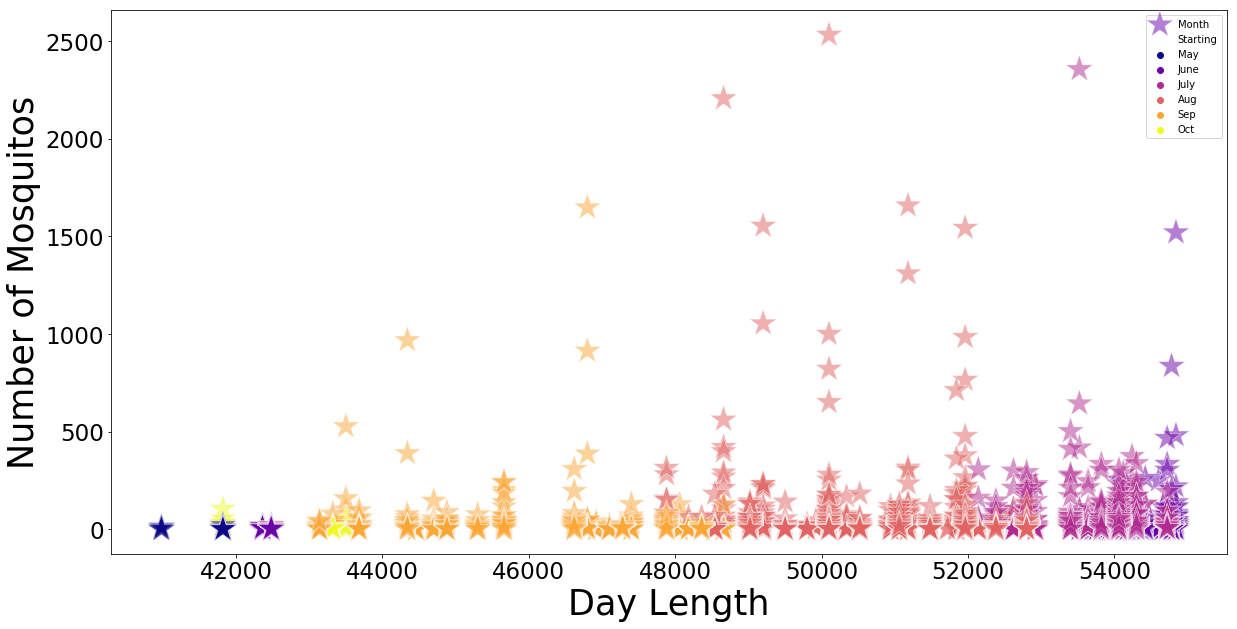

In [127]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['Day_length'].rolling(1).mean().shift(40), df['NumMosquitos'], hue=df['Month'], marker='*', palette='plasma', s=800, legend="full",
               alpha=.5)
plt.xlabel('Day Length', size=35)
plt.xticks(size=23)
plt.ylabel('Number of Mosquitos', size=35)
plt.yticks(size=23)
plt.legend(labels=['Month', 'Starting', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct'])

### Temperature Related

Best Temperature Rolling Mean

In [12]:
hi_corr(df['Tavg'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=7, max_val=21)

0.0666091429540884 Rolling Mean: 1 Shifted Value: 7


In [13]:
np.corrcoef(df['Tavg'].expanding().mean(), df['NumMosquitos'])

array([[1.        , 0.05431909],
       [0.05431909, 1.        ]])

In [14]:
df['Month'].unique()

array([ 5,  6,  7,  8,  9, 10])

Temperature Against Mosquito

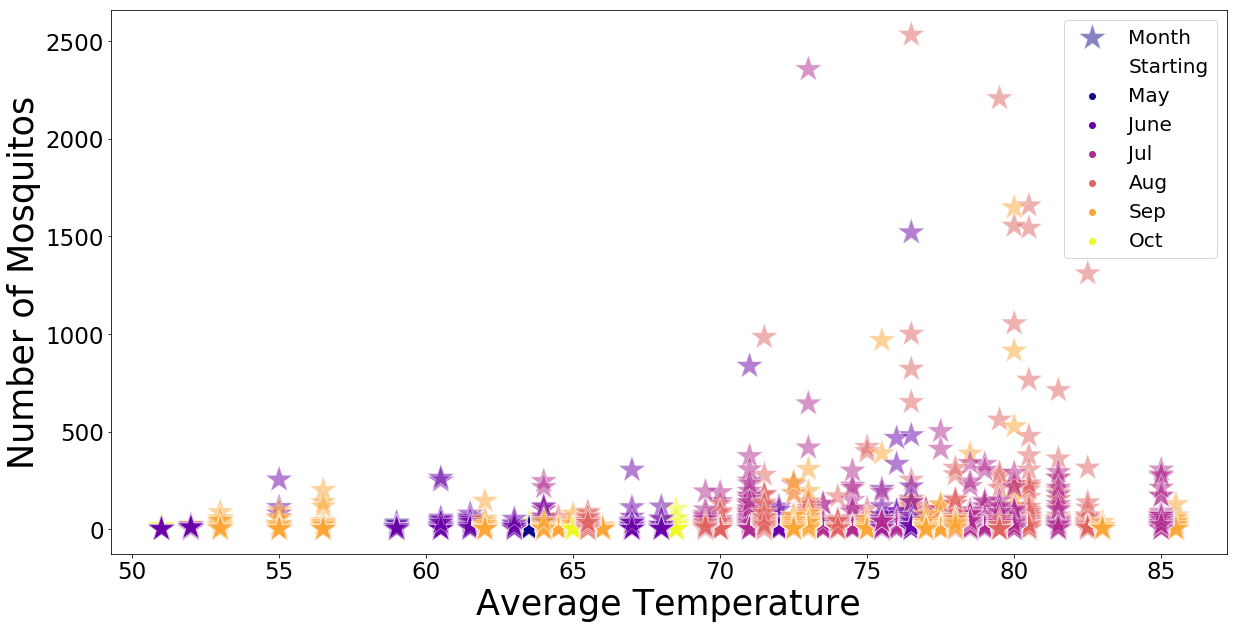

In [138]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['Tavg'].rolling(1).mean().shift(7).dropna(), df['NumMosquitos'].drop(df['NumMosquitos'].index[:7]), 
            alpha = .5, hue=df['Month'], marker='*', s=800 ,palette='plasma', legend='full');
plt.xlabel('Average Temperature', size=35)
plt.xticks(size=23)
plt.ylabel('Number of Mosquitos', size=35)
plt.yticks(size=23)
plt.legend(labels=['Month','Starting','May', 'June', 'Jul', 'Aug', 'Sep', 'Oct'], fontsize=20);

In [16]:
hi_corr(df['Heat'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=7, max_val=21)

-0.041308292774105575 Rolling Mean: 7 Shifted Value: 8


In [17]:
np.corrcoef(df['Heat'].expanding().mean(), df['NumMosquitos'])

array([[ 1.        , -0.04675775],
       [-0.04675775,  1.        ]])

In [18]:
hi_corr(df['Cool'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=7, max_val=21)

0.06816173690042639 Rolling Mean: 1 Shifted Value: 7


In [19]:
np.corrcoef(df['Cool'].expanding().mean(), df['NumMosquitos'])

array([[1.        , 0.05245493],
       [0.05245493, 1.        ]])

In [20]:
hi_corr(df['Tmax'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=7, max_val=21)

0.059233391961211114 Rolling Mean: 1 Shifted Value: 7


In [21]:
np.corrcoef(df['Tmax'], df['NumMosquitos'])

array([[1.        , 0.05710975],
       [0.05710975, 1.        ]])

In [22]:
np.corrcoef(df['Tmax'].expanding().mean(), df['NumMosquitos'])

array([[1.       , 0.0469504],
       [0.0469504, 1.       ]])

In [23]:
hi_corr(df['Tmin'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=7, max_val=21)

0.06767516243864329 Rolling Mean: 1 Shifted Value: 10


In [24]:
np.corrcoef(df['Tmin'].expanding().mean(), df['NumMosquitos'])

array([[1.        , 0.05988869],
       [0.05988869, 1.        ]])

Temperature Difference Against Mosquito

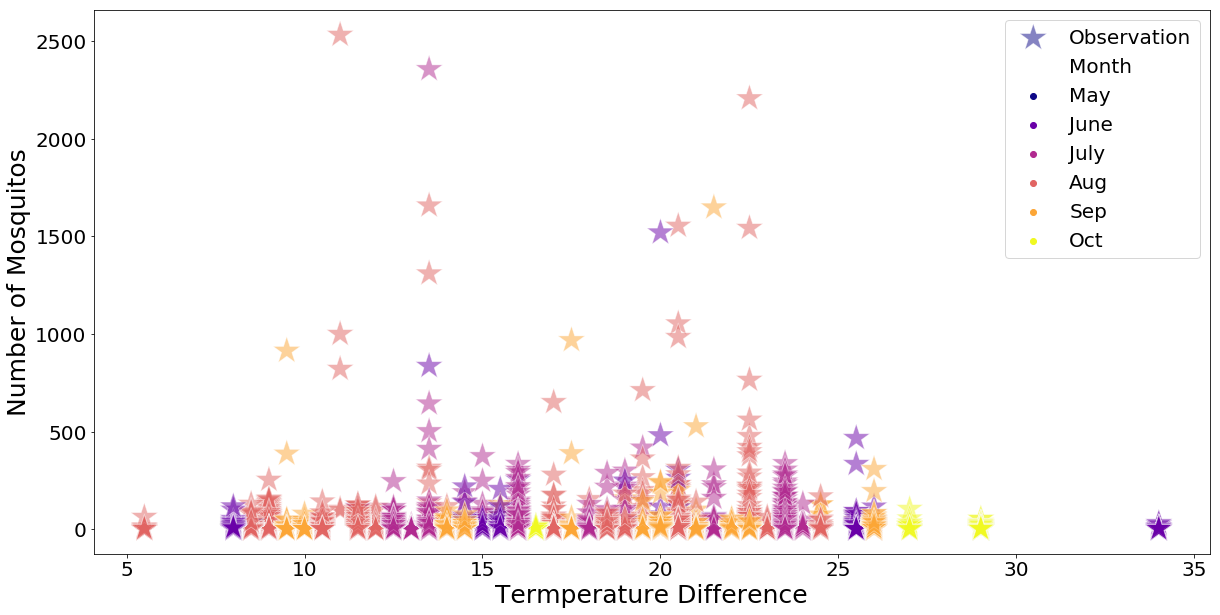

In [136]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=(df['Tmax']-df['Tmin']), y=df['NumMosquitos'], hue=df['Month'], palette="plasma", marker='*', alpha=.5, s=800, legend='full')
plt.xticks(size=20)
plt.xlabel('Termperature Difference', size=25)
plt.yticks(size=20)
plt.ylabel('Number of Mosquitos', size=25)
plt.legend(['Observation', 'Month', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct'], fontsize=20)

Best Departure Rolling Mean

In [25]:
hi_corr(df['Depart'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=7, max_val=21)

0.037569483464707176 Rolling Mean: 1 Shifted Value: 7


In [26]:
np.corrcoef(df['Depart'].expanding().mean(), df['NumMosquitos'])

array([[1.        , 0.00508592],
       [0.00508592, 1.        ]])

### Wind Related

Best Wind Speed Rolling Mean

In [27]:
hi_corr(df['ResultSpeed'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=14, max_val=28)

-0.009319060722963545 Rolling Mean: 7 Shifted Value: 28


In [28]:
np.corrcoef(df['ResultSpeed'].expanding().mean(), df['NumMosquitos'])

array([[ 1.        , -0.00656348],
       [-0.00656348,  1.        ]])

Wind Speed Against Mosquito Population

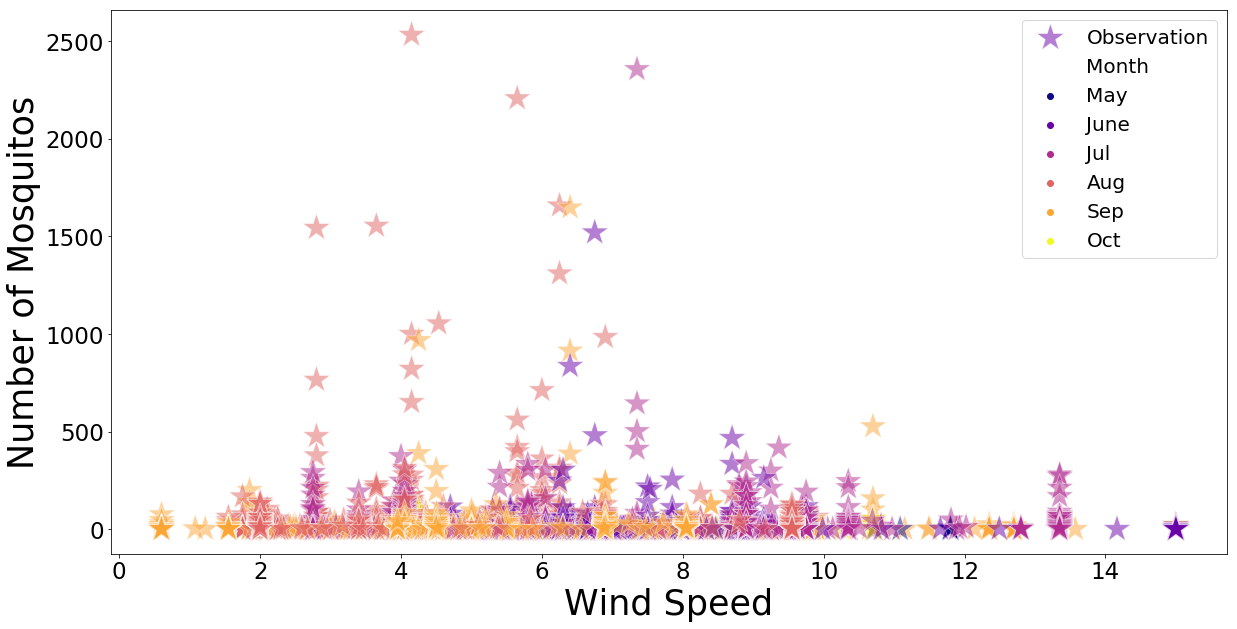

In [123]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['ResultSpeed'].rolling(7).mean().shift(28), df['NumMosquitos'], hue=df['Month'], 
                palette='plasma', marker='*', s=800, alpha=.5, legend='full')
plt.xlabel('Wind Speed', size=35)
plt.xticks(size=23)
plt.ylabel('Number of Mosquitos', size=35)
plt.yticks(size=23)
plt.legend(labels=['Observation','Month','May', 'June', 'Jul', 'Aug', 'Sep', 'Oct'], fontsize=20);

In [84]:
hi_corr(df['ResultDir'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=14, max_val=28)

0.00422555406684047 Rolling Mean: 1 Shifted Value: 18


In [85]:
np.corrcoef(df['ResultDir'].expanding().mean(), df['NumMosquitos'])

array([[1.       , 0.0291355],
       [0.0291355, 1.       ]])

### Precipitation Related

Best Total Precipitation

In [86]:
hi_corr(df['PrecipTotal'], df['NumMosquitos'], rm_min=1, rm_max=100, min_val=7, max_val=100)

0.06796524984931208 Rolling Mean: 50 Shifted Value: 42


In [87]:
np.corrcoef(df['PrecipTotal'].expanding().mean(), df['NumMosquitos'])

array([[1.        , 0.07840287],
       [0.07840287, 1.        ]])

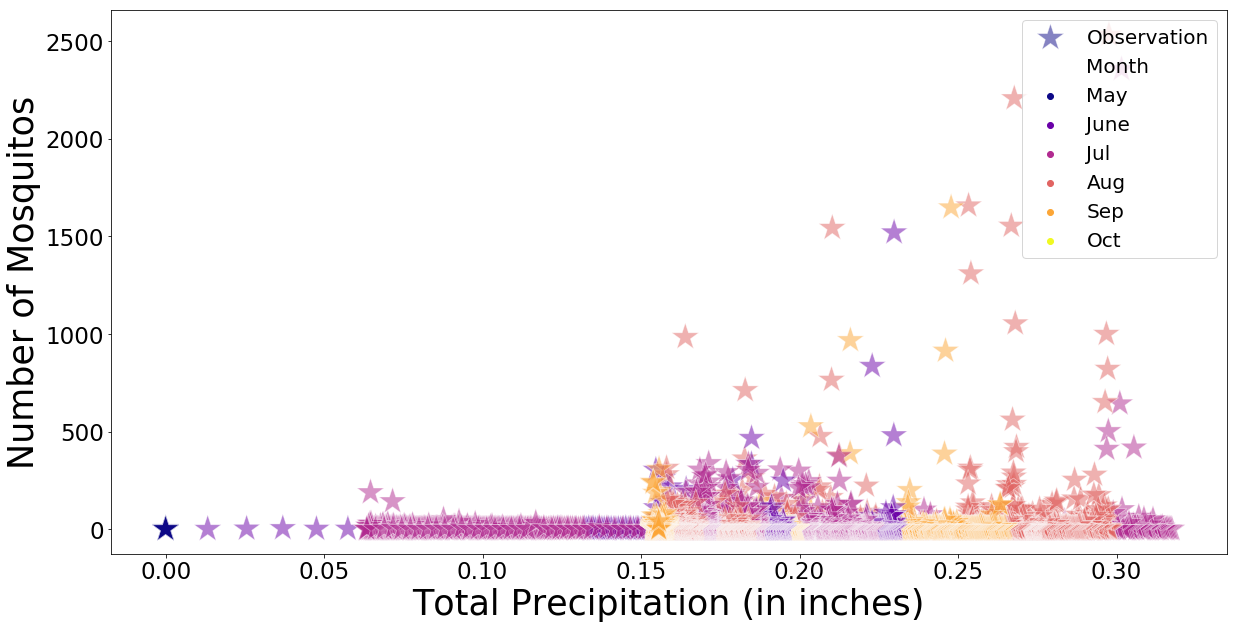

In [183]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['PrecipTotal'].expanding().mean(), df['NumMosquitos'], 
                palette='plasma', hue=df['Month'], marker='*', s=800, alpha=.5, legend='full')
plt.xlabel('Total Precipitation (in inches)', size=35)
plt.xticks(size=23)
plt.ylabel('Number of Mosquitos', size=35)
plt.yticks(size=23)
plt.legend(labels=['Observation','Month','May', 'June', 'Jul', 'Aug', 'Sep', 'Oct'], fontsize=20, loc=1);

In [89]:
df['PrecipTotal'].value_counts().sort_index(ascending=True)

0.000    5071
0.005     335
0.010     101
0.015      93
0.025      52
0.030     124
0.075      18
0.080     117
0.085      35
0.090     206
0.100      87
0.105      87
0.130      77
0.140      18
0.165      83
0.220     183
0.255      19
0.260     127
0.280     120
0.290     134
0.295     153
0.345      61
0.420     108
0.450     105
0.480      45
0.530     354
0.625      61
0.670     103
0.685     184
0.740      64
0.755      63
1.070      50
1.235     116
2.420      89
Name: PrecipTotal, dtype: int64

The best rolling mean values for `PrecipTotal` tend to be the max passed through it. Given that, it appears that an expanding mean for total precipitation may give us the best results.

Best Wetbulb Rolling Mean
>The lowest temperature that can be reached by evaporating water into the air. Note: the wet bulb temperature will always be less than or equal to the temperature. It feels more comfortable when wet-bulb temperature is low. [Source] (http://apollo.lsc.vsc.edu/classes/met130/notes/chapter4/wet_bulb.html)

In [90]:
hi_corr(df['WetBulb'], df['NumMosquitos'], rm_min=1, rm_max=100, min_val=7, max_val=100)

0.07067325274604591 Rolling Mean: 100 Shifted Value: 7


In [91]:
np.corrcoef(df['WetBulb'].expanding().mean(), df['NumMosquitos'])

array([[1.        , 0.05825479],
       [0.05825479, 1.        ]])

Best Dewpoint Rolling Mean
 > the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form.

In [92]:
hi_corr(df['DewPoint'], df['NumMosquitos'], rm_min=1, rm_max=100, min_val=7, max_val=100)

/Users/jonjohnson/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/jonjohnson/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


-0.002170705197829583 Rolling Mean: 9 Shifted Value: 74


In [93]:
np.corrcoef(df['DewPoint'].expanding().mean(), df['NumMosquitos'])

array([[1.00000000e+00, 8.56341637e-04],
       [8.56341637e-04, 1.00000000e+00]])

### Ensuring DataFrames are Correctly Setup

In [95]:
weather = pd.read_csv('../data/weather.csv')

In [96]:
weather.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000


In [97]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [98]:
weather['PrecipTotal'].value_counts().sort_index(ascending=True)[:5]

  T      318
0.00    1577
0.01     127
0.02      63
0.03      46
Name: PrecipTotal, dtype: int64

In [99]:
df.columns

Index(['Trap', 'Species', 'NumMosquitos', 'WnvPresent', 'Day_length', 'Tmax',
       'Tmin', 'Tavg', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Sunset',
       'Sunrise', 'Heat', 'Depart', 'DewPoint', 'WetBulb', 'Cool', 'CodeSum',
       'PrecipTotal', 'StnPressure', 'Date2', 'Latitude', 'Longitude', 'Month',
       'Year'],
      dtype='object')

In [101]:
df['Month'].value_counts().sort_index(ascending=False)

10     267
9     1986
8     2808
7     2136
6     1364
5       82
Name: Month, dtype: int64

In [102]:
df['CodeSum'].value_counts()

                       4338
RA BR                   763
RA                      707
HZ                      696
TSRA RA BR              353
BR HZ                   323
TSRA RA                 291
BR                      273
TS BR                   134
RA BR HZ                132
TSRA RA BR VCTS         116
RA DZ BR                114
TS TSRA RA FG BR HZ     108
TS TSRA BR               89
TSRA BR HZ VCTS          69
TS TSRA RA               61
DZ BR                    35
RA HZ                    23
TS RA                    18
Name: CodeSum, dtype: int64

### Extra Plots

Number of Mosquitos Over Time

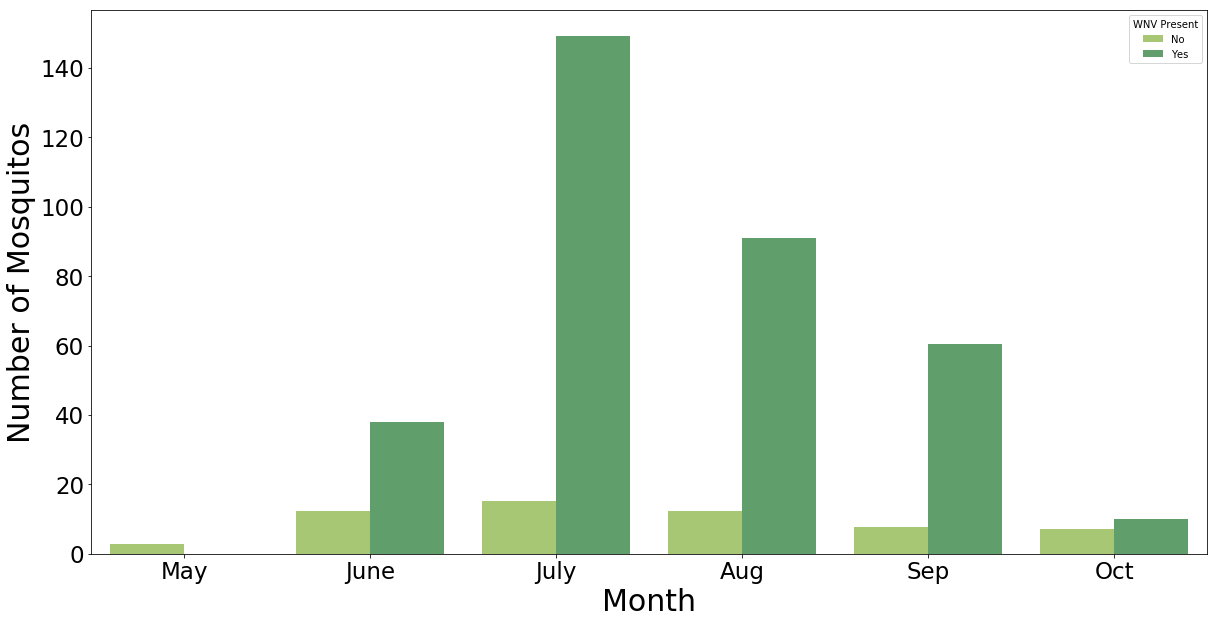

In [173]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Month'], y=df['NumMosquitos'], hue=df['WnvPresent'], dodge=True, palette='summer_r', ci=None)
plt.xlabel('Month', size=30)
plt.xticks([0, 1, 2, 3, 4, 5],['May', 'June', 'July', 'Aug', 'Sep', 'Oct'], size=23)
plt.ylabel('Number of Mosquitos', size=30)
plt.yticks(size=23)
plt.legend(['No', 'Yes'], title='WNV Present')